<a href="https://colab.research.google.com/github/Nitin1901/Classification-of-MNIST-dataset/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST dataset 

This notebook provides a detailed insight of the NN architecture used, the callback procedure and other methods used.


---



---



### Importing the necessary libraries


*   TensorFlow (v2.2)
*   Numpy
*   Matplotlib



In [13]:
import tensorflow as tf
print(tf.__version__)

import numpy as np

import matplotlib.pyplot as plt

2.2.0


### Importing the dataset

The MNIST dataset, often termed as the "Hello World" for Neural Networks, is available in the Keras API and can be imported easily.


In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


### Data preprocessing

The pixel values range from 0-255.

Normalising the data can increase the performance of the model.

In [4]:
x_train, x_test = x_train/255., x_test/255.

### Building the model

The model is architectured as:
FLATTEN -> DENSE(128) -> DENSE(64) -> OUTPUT(10)

Fortunately, we have Keras API which can construct the computational graph in just 4-5 lines of code. More about `Sequential`, `Dense` can be found [here](https://keras.io/api/).

In [5]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(units=128, activation='relu'),
                             tf.keras.layers.Dense(units=64, activation='relu'),
                             tf.keras.layers.Dense(units=10, activation='softmax')
                            ])

Compiling the model with `Adam` optimizer and `Sparse categorical cross entropy` as the loss function. 

The loss function describes how bad the model is and optimizer is responsible for improving the model.

In [6]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

Defining a custom `CallBack` class.
A callback is used when we want the model to exit at a particular point(when the accuracy condt. is met). 

In [7]:
class myCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs['accuracy']>0.99):
            print("\n\nAccuracy greater than 99%. Stopping the training")
            self.model.stop_training = True

callbacks = myCallBack()

Training the model on `x_train`, `y_train` for 10 epochs with the custom callbacks set.

In [8]:
model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2397 - accuracy: 0.9303
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1002 - accuracy: 0.9696
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0694 - accuracy: 0.9786
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0523 - accuracy: 0.9837
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0429 - accuracy: 0.9862
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0350 - accuracy: 0.9882
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0287 - accuracy: 0.9904


### Evaluating the model's performance

We check the loss and acc on the test set using `.evaluate()` method.

In [9]:
loss, acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0805 - accuracy: 0.9783


Predicting the classes for x_test images.

In [11]:
p = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


Locating the indices in the x_test where the model predicted wrong.

In [14]:
wrong_idx = np.where(p!=y_test)

Sample wrong output

Real - 9
Predicted - 8


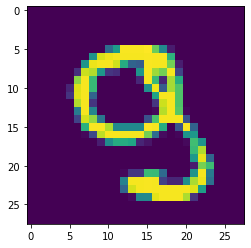

In [19]:
print("Real -", y_test[wrong_idx[0][0]])
print("Predicted -", p[wrong_idx[0][0]])
plt.imshow(x_test[wrong_idx[0][0]])